# Charge Density

Here code examples for charge and spin densities are given..

## The 'read_ECHG' and 'read_ECH3' methods

Methods are defined in the `crystal_io.Properties_output` class, which read formatted output files generated by CRYSTAL and return to the `electronics.ChargeDensity` class. The `data` attribute is a (nZ\*)nY\*nX\*nspin array.

It requires the Crgra2006 (fort.25) file (2D) or Gaussian CUBE file (3D).

The standard screen output is required to identify the indices of corresponding 2D data maps. Otherwise the code only reads the first 2D data map.

In [1]:
from CRYSTALpytools.crystal_io import Properties_output

chg = Properties_output('dens_hematite.out').read_ECHG('dens_hematite.f25')
print('Spin: {:d}'.format(chg.spin))
print('Base vectors (point A, B, C):')
print(chg.base)
print('Data dimensionality:')
print(chg.data.shape)

Spin: 2
Base vectors (point A, B, C):
[[ 2.93009  0.       4.61958]
 [ 0.       0.       0.     ]
 [-2.9301   0.       9.23916]]
Data dimensionality:
(24, 42, 2)


With the `method` input the user can subtract the difference of charge between inputs of arbitrary length. Data is subtracted from the first entry based on the following entries.

Since the 'spin' dimension is somewhat 'meaningless', the returned object has no spin dimension.

In [2]:
from CRYSTALpytools.electronics import ChargeDensity

dchg = Properties_output('dens_MgOCO.out').read_ECH3(
    'dens_MgOCO.cube', 'dens_MgO.cube', 'dens_CO.cube', method='subtract')
print('Spin: {:d}'.format(dchg.spin))
print('Data dimensionality:')
print(dchg.data.shape)

Spin: 1
Data dimensionality:
(136, 20, 20, 1)


For 2D charge densities, because a fort.25 file allows multiple '-%-MAPN' entries. The code does not check every output in this case, so make sure the charge (spin) density is the first (second) 2D grid data. A safer way is to generate the `ChargeDensity` object for every file separately and call the `subtract` method.

In [3]:
dchg = Properties_output().read_ECHG('dens_hematite.f25',
                                     'dens_hematitePATO.f25',
                                     method='subtract')
print('Spin: {:d}'.format(dchg.spin))
print('Data dimensionality:')
print(dchg.data.shape)

Spin: 1
Data dimensionality:
(24, 42, 1)


/tmp/ipykernel_31619/3901349565.py:1: UserWarning: Properties output file not found: Only the first 1 (2) density map(s) will be read for spin=1(2).
  dchg = Properties_output().read_ECHG('dens_hematite.f25',
/home/huanyu/apps/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/electronics.py:1249: UserWarning: Properties output file not found: Only the first 1 (2) density map(s) will be read for spin=1(2).
  obj = Properties_output().read_ECHG(i, method='normal')


In [4]:
from CRYSTALpytools.electronics import ChargeDensity

dchg = Properties_output('dens_hematite.out').read_ECHG('dens_hematite.f25')
pato = Properties_output('dens_hematitePATO.out').read_ECHG('dens_hematitePATO.f25')
dchg = dchg.subtract(pato)

print('Spin: {:d}'.format(dchg.spin))
print('Data dimensionality:')
print(dchg.data.shape)

Spin: 1
Data dimensionality:
(24, 42, 1)


'PATO' is specified in the file 'dens_hematite'.

* By default method only the charge densities of the bonded system is read.
* `method='subtract'` gets the charge density difference after and before bond formation
* If the charge density of non-bonded system are wanted (very rare), a separate calculation with 'PATO+ECHG' only is needed.

**NOTE**

The 'subtract' method requires screen output, otherwise the code only reads the first 2D map data.

In [5]:
dchg = Properties_output('dens_hematite.out').read_ECHG('dens_hematite.f25', method='subtract')
print('Spin: {:d}'.format(dchg.spin))
print('Data dimensionality:')
print(dchg.data.shape)

Spin: 1
Data dimensionality:
(24, 42, 1)


## 'electronics.ChargeDensity' class

The `electronics.ChargeDensity` class has object-oriented methods for data analysis and plotting.

### Instantiatation

The classmethod `from_file` is a wrapper of I/O functions introduced above. For spin-polarized systems, the user can also save the data in $\alpha$ and $\beta$ states rather than charge density ($\alpha+\beta$) and spin density ($\alpha-\beta$).

The code automatically judges the dimensionality according to the file format.

In [6]:
from CRYSTALpytools.electronics import ChargeDensity

chg = ChargeDensity.from_file('dens_hematite.f25',
                              output='dens_hematite.out', method='alpha_beta')

### Plot 2D charge/spin densities

The `plot_2D()` method helps to visualize the charge / spin densities.

Plot them together with default setups (color-filled contour plot):

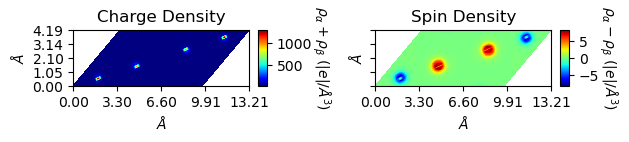

In [1]:
from CRYSTALpytools.electronics import ChargeDensity

fig = ChargeDensity.from_file('dens_hematite.f25',
                              output='dens_hematite.out').plot_2D()

Not nice. Change the settings of `levels` for plot levels and range, and `figsize` for figure size.

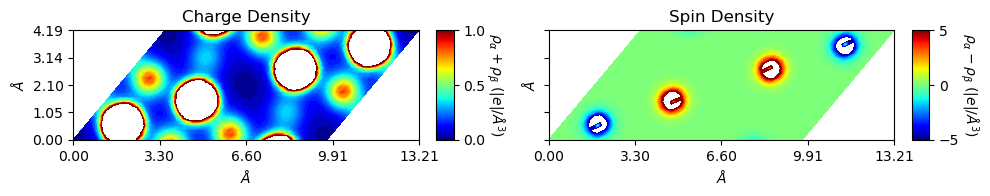

In [2]:
from CRYSTALpytools.electronics import ChargeDensity
import numpy as np

chglevel = np.log10(np.linspace(1, 10, 100))
spinlevel = np.linspace(-5, 5, 100)

chg = ChargeDensity.from_file('dens_hematite.f25', output='dens_hematite.out')
fig = chg.plot_2D(levels=[chglevel, spinlevel], figsize=[10, 5])

In this example, the plot is non-orthogonal. The user can get orthogonal plot by setting `rectangle=True`. The cmode moves the non-orthogonal part on the right to the left hand side, i.e., similar to the 'RECTANGU' keyword of 'MAPNET' (see CRYSTAL manual).

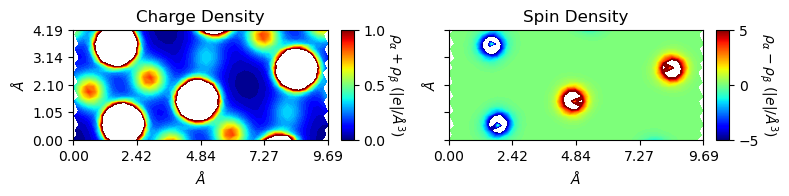

In [3]:
from CRYSTALpytools.electronics import ChargeDensity
import numpy as np

chglevel = np.log10(np.linspace(1, 10, 100))
spinlevel = np.linspace(-5, 5, 100)

chg = ChargeDensity.from_file('dens_hematite.f25', output='dens_hematite.out')
fig = chg.plot_2D(levels=[chglevel, spinlevel], figsize=[8, 5], rectangle=True)

The monovacancy is off-center after rectangle plotting. The user can modify periodicity by setting `a_range` and `b_range`. Both of them uses fractional coordinates of plot base vector. If they are used with `rectangle=True`, that refers to the **old, non-orthogonal** base vectors. Coordinates of the original plotting window are kept.

By setting `lineplot=True` and `colorplot=False`, contour lines is plotted. If both are 'True', contour lines are overlapped with color plots (not looking good with this example). Solid lines for positive values and 0 (doubled width). Dotted lines for negative values.

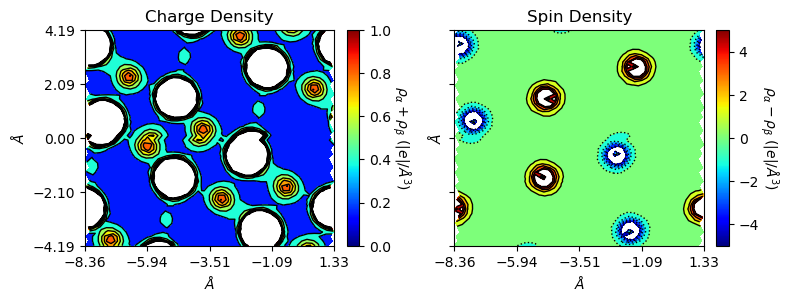

In [4]:
from CRYSTALpytools.electronics import ChargeDensity
import numpy as np

chglevel = np.log10(np.linspace(1, 10, 10))
spinlevel = np.linspace(-5, 5, 10)

chg = ChargeDensity.from_file('dens_hematite.f25', output='dens_hematite.out')
fig = chg.plot_2D(levels=[chglevel, spinlevel], figsize=[8, 6], lineplot=True, colorplot=True,
                  a_range=[-0.5, 0.5], b_range=[-1, 1], rectangle=True)

It is also possible to get color-coded lines for contourplots with `lineplot=True` and `colorplot=False`. Positive values are denoted by solid red lines and negative by dotted blue lines. 0 is denoted by the solid black lines with doubled width.

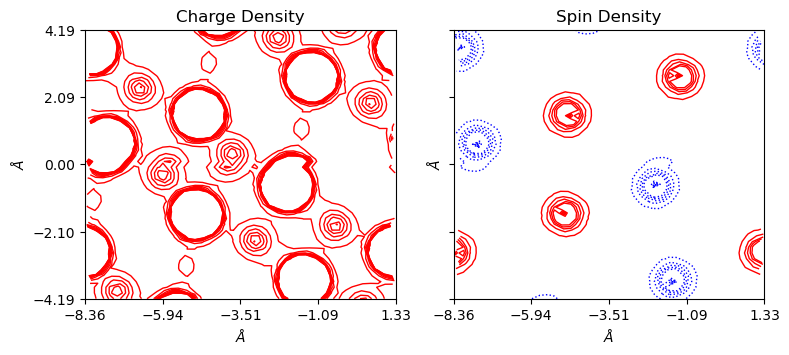

In [5]:
from CRYSTALpytools.electronics import ChargeDensity
import numpy as np

chglevel = np.log10(np.linspace(1, 10, 10))
spinlevel = np.linspace(-5, 5, 10)

chg = ChargeDensity.from_file('dens_hematite.f25', output='dens_hematite.out')
fig = chg.plot_2D(levels=[chglevel, spinlevel], figsize=[8, 6], lineplot=True, colorplot=False,
                  a_range=[-0.5, 0.5], b_range=[-1, 1], rectangle=True)

With `a_range` and `b_range`, one can also plot supercells. Set `edgeplot=True` to mark unit plot window boundaries at origin (0,0,0,), which is not influanced by 'range' or 'rectangle' options.

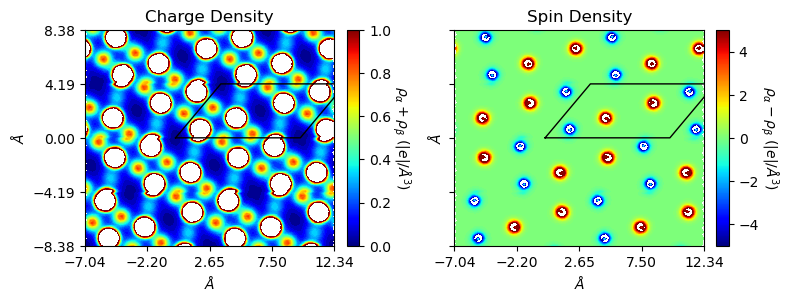

In [6]:
from CRYSTALpytools.electronics import ChargeDensity
import numpy as np

chglevel = np.log10(np.linspace(1, 10, 100))
spinlevel = np.linspace(-5, 5, 100)

chg = ChargeDensity.from_file('dens_hematite.f25', output='dens_hematite.out')
fig = chg.plot_2D(levels=[chglevel, spinlevel], figsize=[8, 6],
                  a_range=[0, 2], b_range=[-2, 2],
                  rectangle=True, edgeplot=True)

### Plot 3D charge/spin densities

The `plot_3D()` method helps to visualize the **2D/3D** charge / spin densities with 3D structures. It requires [MayaVi](https://docs.enthought.com/mayavi/mayavi/), which is not in the dependency list of CRYSTALpytools.

Plot charge densities of hematite as 3D isosurfaces.

In [1]:
from CRYSTALpytools.electronics import ChargeDensity

obj = ChargeDensity.from_file('dens_hematite_chg.cube',
                              output='dens_hematite.out')
obj.plot_3D(isovalue=[0.1, 0.2, 0.5, 1.0], opacity=0.2)

/home/huanyu/apps/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/electronics.py:1232: UserWarning: Inconsistent geometries are given in output and CUBE files, using the one from output.
  cls = Properties_output(output).read_ECH3(*files, method=method)


MayaVi output

<img src="./dens_hematite3Diso.png" width="320">

Plot spin densities of hematite as 3D volume data. Use the `grid_display_range` to change the display range of the data grid.

**NOTE** In some cases it might be very time consuming!

In [2]:
from CRYSTALpytools.electronics import ChargeDensity

obj = ChargeDensity.from_file('dens_hematite_spin.cube',
                              output='dens_hematite.out')
obj.plot_3D(volume_3d=True, vmin=-1, vmax=1, grid_display_range=[[0, 1], [0, 1], [0,1]])

/home/huanyu/apps/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/electronics.py:1232: UserWarning: Inconsistent geometries are given in output and CUBE files, using the one from output.
  cls = Properties_output(output).read_ECH3(*files, method=method)


MayaVi output

<img src="./dens_hematite3Dvol.png" width="320">

`plot_3D` can also be used to visualize 2D data planes, in which case the 3D structure is plotted.

Plot spin densities of hematite in 2D plane. Use the `display_range` to change the display range of the structure. Use `contour_2d=True` to plot contour lines.

In [3]:
from CRYSTALpytools.electronics import ChargeDensity

obj = ChargeDensity.from_file('dens_hematite.f25',
                              output='dens_hematite.out')
obj.plot_3D(option='spin',
            isovalue=[-1, -0.5, -0.25, 0, 0.25, 0.5, 1],
            contour_2d=True,
            interp='linear',
            interp_size=2,
            display_range=[[0, 2], [0, 2], [0,2]])

MayaVi output:

<img src="./dens_hematite3Dplane.png" width="480">

### Analysis

As has illustrated above, the `subtract()` method helps to generate difference maps. The `alpha_beta()` method splits $\alpha$ and $\beta$ densities into the original charge and spin densities.

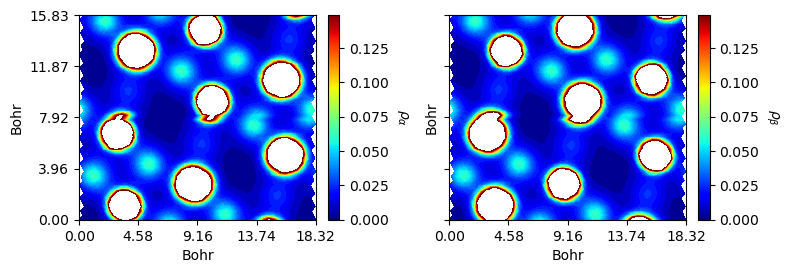

In [10]:
from CRYSTALpytools.electronics import ChargeDensity
import numpy as np

chglevel = np.log10(np.linspace(1, 10, 100)) * 0.53**3 # roughly convert AA^-3 to Bohr^-3

chg = ChargeDensity.from_file('dens_hematite.f25', method='alpha_beta',
                              output='dens_hematite.out')
fig = chg.plot_2D(unit='a.u.', levels=[chglevel, chglevel], figsize=[8, 6],
                  cbar_label=[r'$\rho_{\alpha}$', r'$\rho_{\beta}$'],
                  b_range=[0, 2], rectangle=True, title=None)

### Conversion to XSF

The `to_xsf()` method helps to write 2D/3D charge/spin densities into the [XCrySDen](http://www.xcrysden.org/) XSF format for visualization and analysis. Such file format is accepted by many popular modelling software such as [XCrySDen](http://www.xcrysden.org/), [VMD](https://www.ks.uiuc.edu/Research/vmd/) and [VESTA](https://jp-minerals.org/vesta/en/).

**NOTE**

For 3D data grid, if CUBE file(s) are read without output, the XSF file output has the 3D 'CRYSTAL' periodicity. As far as the authors have been aware of, this only causes Segmentation Fault of XCrySDen 1.6.2 when dealing with low dimensional systems. Available solution includes:

1. including output file  
2. using other software such as VESTA  
3. changing the keyword manually.

Convert the same system into XSF format with 2D data grid.

In [17]:
from CRYSTALpytools.electronics import ChargeDensity

chg = ChargeDensity.from_file('dens_hematite.f25', output='dens_hematite.out')
chg.to_xsf('dens_hematite.xsf')

Visualize charge densities in XCrySDen.

<img src="./dens_hematite.png" width="480">

Get charge density difference before and after CO adsoprtion onto the MgO $(001)$ 2 layers slab.

In [19]:
from CRYSTALpytools.electronics import ChargeDensity

dchg = ChargeDensity.from_file('dens_MgOCO.cube',
                               'dens_MgO.cube',
                               'dens_CO.cube',
                               output='dens_MgOCO.out',
                               method='subtract')
dchg.to_xsf('dens_dMgOCO.xsf')

Visualize charge density difference in VESTA. The cell has been expanded 3 times in both directions.

<img src="./dens_dMgOCO.png" width="480">

## The 'plot.plot_ECHG()' function

The `plot.plot_ECHG()` function enables a higher-level of plotting. It accepts extendable length of 'fort.25' files or `ChargeDensity` objects.

### Single-system charge / spin density.

By default the charge / spin densities of a single sysmtem is plotted, as the example showed above.

### Multi-system charge / spin densities

`plot_ECHG()` can read entries of arbitrary length and return to the matplotlib Figure object with subplots. For comparison, the uniform scale can be used by setting `levels`.

/home/huanyu/apps/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/electronics.py:1230: UserWarning: Properties output file not found: Only the first 1 (2) density map(s) will be read for spin=1(2).
  cls = Properties_output(output).read_ECHG(*files, method=method)


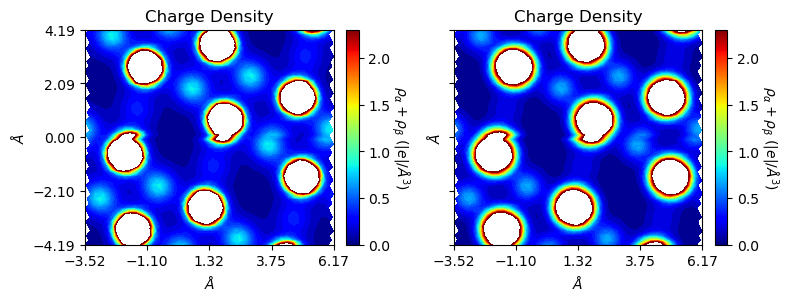

In [1]:
from CRYSTALpytools.plot import plot_ECHG
import numpy as np

chglevel = np.log(np.linspace(1, 10, 100))
files = ['dens_hematite.f25', 'dens_hematitePATO.f25']

figs = plot_ECHG(*files, option='charge', levels=chglevel,
                 rectangle=True, figsize=[8, 6], b_range=[-1, 1])

With `option='diff'`, the user can quickly plot charge difference maps. It returns to non spin-polarized solution (`obj.spin=1`) as only charge density difference is considered. 

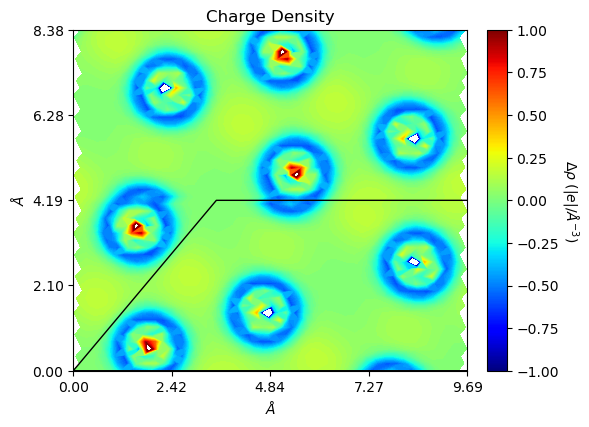

In [2]:
from CRYSTALpytools.plot import plot_ECHG
import numpy as np

chglevel = np.linspace(-1, 1, 100)
files = ['dens_hematite.f25', 'dens_hematitePATO.f25']

figs = plot_ECHG(*files, option='diff', levels=chglevel, rectangle=True,
                 b_range=[0, 2], edgeplot=True, figsize=[6, 6],
                 add_title=False, cbar_label=r'$\Delta\rho$ ($|e|/\AA^{-3}$)')

If the object contains both charge and 'PATO' charge, and was generated with 'subtract' method, plot it with 'charge'. Otherwise a warning message is generated.

/home/huanyu/apps/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/plot.py:174: UserWarning: Spin options not available to non spin-polarized cases.
  fig = o.plot_2D(unit, 'both', levels, lineplot, linewidth, isovalues,


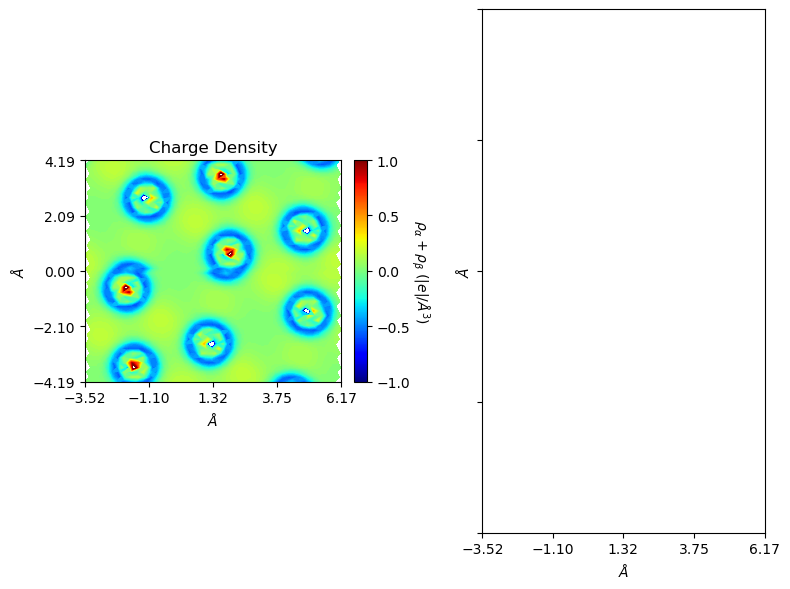

In [3]:
from CRYSTALpytools.electronics import ChargeDensity
from CRYSTALpytools.plot import plot_ECHG
import numpy as np

chglevel = np.linspace(-1, 1, 100)
dchg = ChargeDensity.from_file('dens_hematite.f25', output='dens_hematite.out',
                               method='subtract')
fig = plot_ECHG(dchg, levels=chglevel, figsize=[8, 6], b_range=[-1, 1],
                rectangle=True)

The following code block is only used to generate a nice thumbnail for the example gallary.

This is the end of the example notebook. For more details, please refer to the [API documentations](https://crystal-code-tools.github.io/CRYSTALpytools/crystalpytools.electronics.html).

(-0.5, 451.5, 485.5, -0.5)

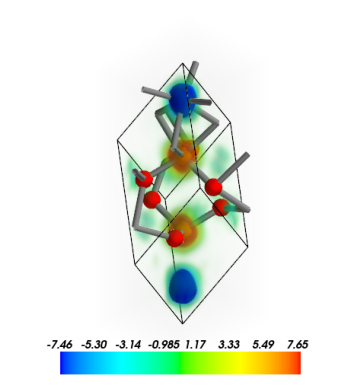

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(plt.imread("./dens_hematite3Dvol.png"))
ax.axis('off')